This first notebook is to preprocess and split the data. 
Also some intial EDA insights about the data as needed. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import os


In [ ]:
# Paths
DATA_PATH = "data/adult.data"  
OUTPUT_DIR = "data/data_outputs"
os.makedirs(OUTPUT_DIR, exist_ok=True)


In [ ]:
# Column names to extract
column_names = [
    "age", "workclass", "fnlwgt", "education", "education-num",
    "marital-status", "occupation", "relationship", "race", "sex",
    "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"
]

In [ ]:
# Load data
df = pd.read_csv(DATA_PATH, names=column_names, na_values=" ?", skipinitialspace=True)


# Check missing values
print("Shape:", df.shape)
print("\nMissing values:\n", df.isnull().sum())


Shape: (32561, 15)

Missing values:
 age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


In [ ]:
# Drop missing values
# df_clean = df.dropna().reset_index(drop=True)


In [ ]:
# Encode categorical variables 
df_encoded = df_clean.copy()
label_encoders = {}
for col in df_encoded.select_dtypes(include="object").columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le


In [ ]:
# Split for trainf & holdout
train_df, holdout_df = train_test_split(
    df_encoded,
    test_size=0.25,
    stratify=df_encoded["income"],
    random_state=42
)

In [ ]:
# Save split data for later use
train_df.to_csv(os.path.join(OUTPUT_DIR, "train_df.csv"), index=False)
holdout_df.to_csv(os.path.join(OUTPUT_DIR, "holdout_df.csv"), index=False)

print("\nTrain set shape:", train_df.shape)
print("Holdout set shape:", holdout_df.shape)



Train set shape: (24420, 15)
Holdout set shape: (8141, 15)


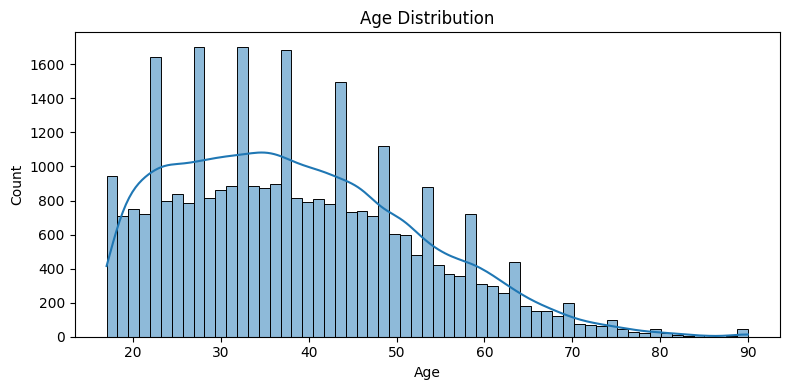

In [ ]:

# EDA: PLot age dist. for real data
plt.figure(figsize=(8, 4))
sns.histplot(df_clean["age"], kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, "eda_age_distribution.png"))
plt.show()


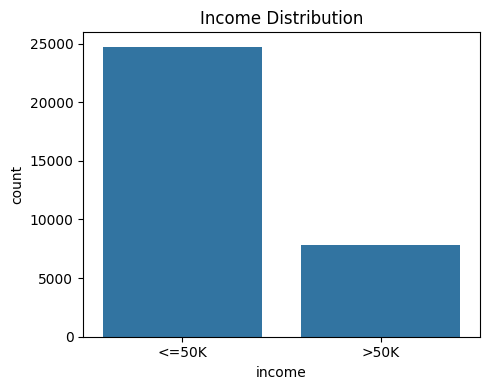

In [ ]:
# EDA: Plot income class balance
plt.figure(figsize=(5, 4))
sns.countplot(data=df_clean, x="income")
plt.title("Income Distribution")
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, "eda_income_balance.png"))
plt.show()

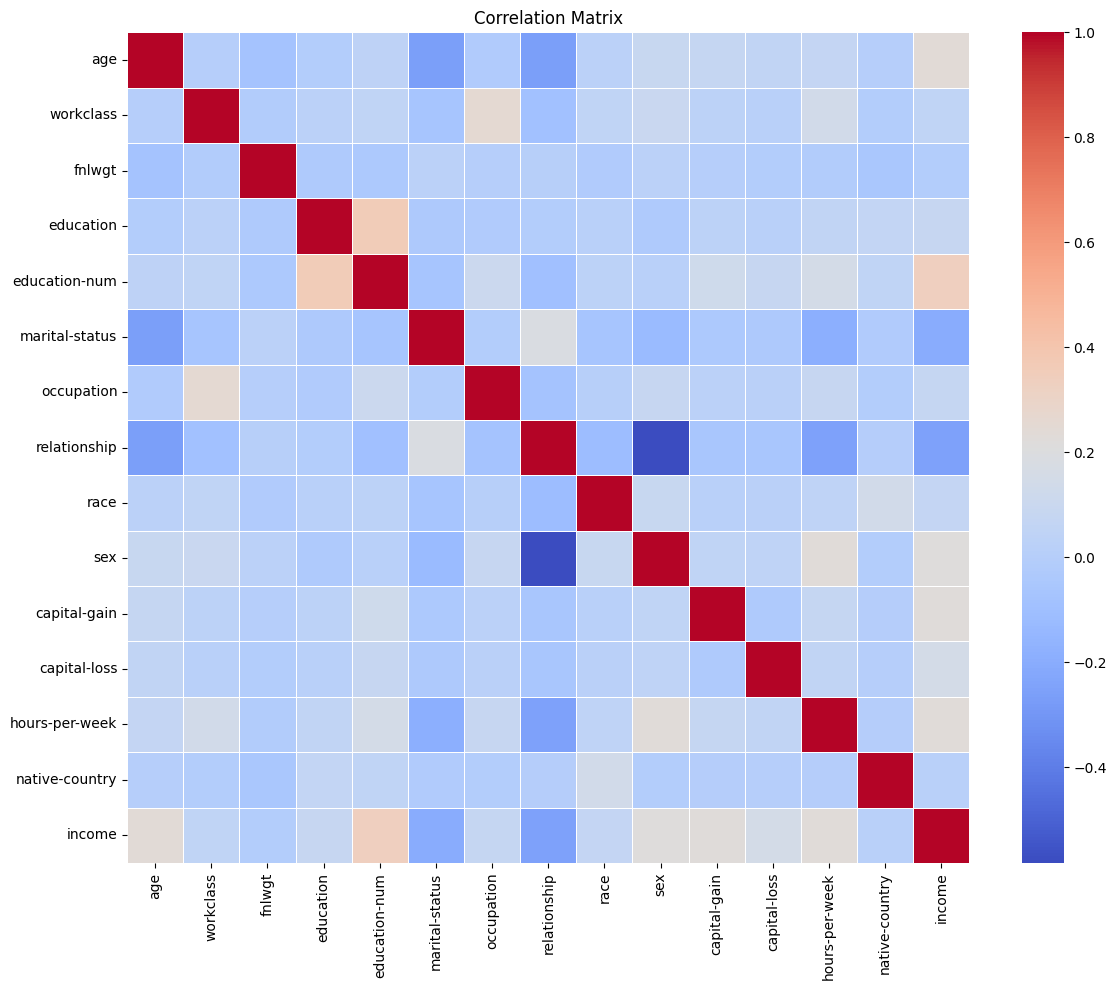

In [ ]:
# EDA: Correlation matrix
plt.figure(figsize=(12, 10))
corr = df_encoded.corr()
sns.heatmap(corr, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, "eda_correlation_matrix.png"))
plt.show()